<a href="https://colab.research.google.com/github/gracialukelo/genAI/blob/main/text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text-to-Image Generation using Stable Diffusion and Diffusers

In [1]:
# !pip install diffusers transformers accelerate

In [1]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [2]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [3]:
model_id_01 = "stabilityai/stable-diffusion-3.5-large"
model_id_02 = "stabilityai/stable-diffusion-xl-base-1.0"
model_id_03 = "dreamlike-art/dreamlike-diffusion-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id_03, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
prompt = """dreamlikeart, a grungy Dog brown pudel sweet and beautiful, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [6]:
image = pipe(
    prompt,
    num_inference_steps=28, # Guck nach unten
    guidance_scale=3.5,
).images[0]

  0%|          | 0/28 [00:00<?, ?it/s]

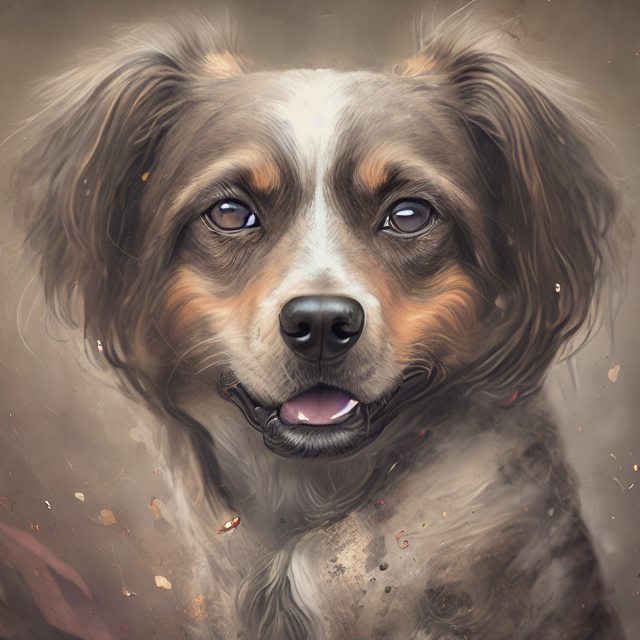

In [7]:
image

Der Prompt:
dreamlikeart, a grungy Dog brown pudel sweet and beautiful, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



(-0.5, 639.5, 639.5, -0.5)

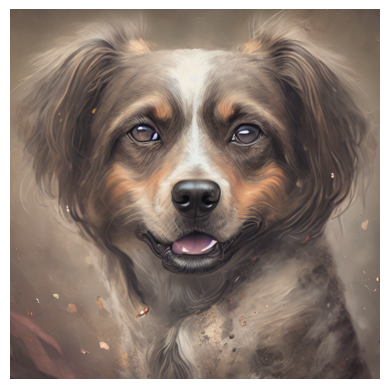

In [11]:
print(f"Der Prompt:\n{prompt}")
plt.imshow(image)
plt.axis('off')

In [19]:
prompt2 = """A Soldier is standing next to the chair & He is accompanied by his tiger. Make sure to keep it cinematic and color to be golden iris
"""
image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Der Prompt:
A Soldier is standing next to the chair & He is accompanied by his tiger. Make sure to keep it cinematic and color to be golden iris



(-0.5, 639.5, 639.5, -0.5)

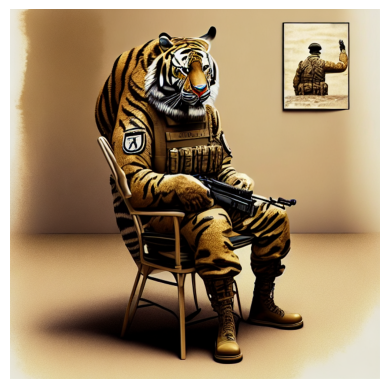

In [20]:
print(f"Der Prompt:\n{prompt2}")
plt.imshow(image)
plt.axis('off')

In [22]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images > 1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis('off')

  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()


In [23]:
prompt_3 = """dreamlikeart, a grungy Dog brown pudel sweet and beautiful, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

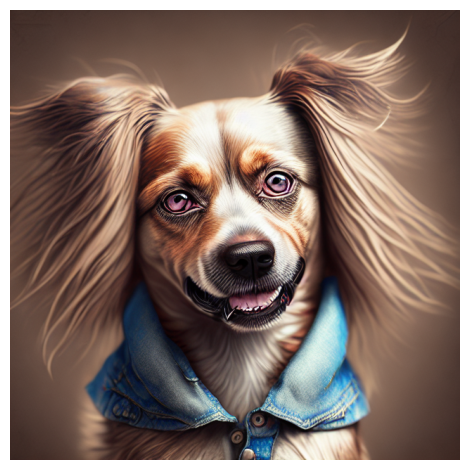

In [24]:
generate_image(pipe, prompt_3, params)

  0%|          | 0/100 [00:00<?, ?it/s]

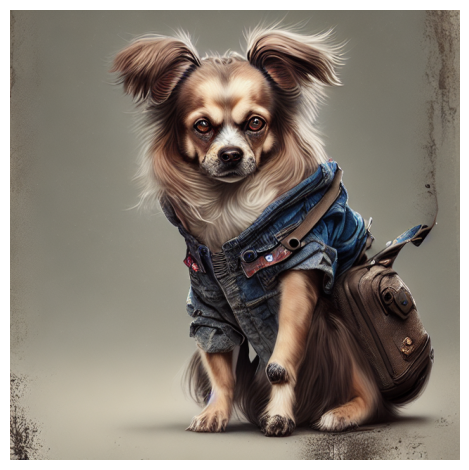

In [25]:
#num inference steps
params = {'num_inference_steps': 100}
generate_image(pipe, prompt_3, params)

  0%|          | 0/100 [00:00<?, ?it/s]

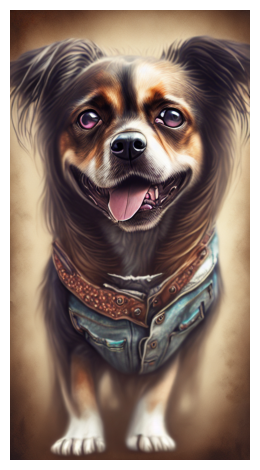

In [26]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt_3, params)

  0%|          | 0/100 [00:00<?, ?it/s]

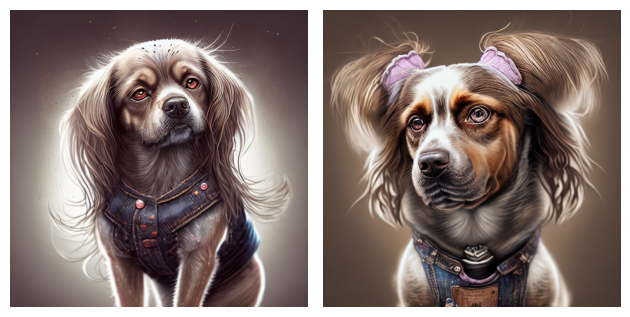

In [27]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt_3, params)

  0%|          | 0/100 [00:00<?, ?it/s]

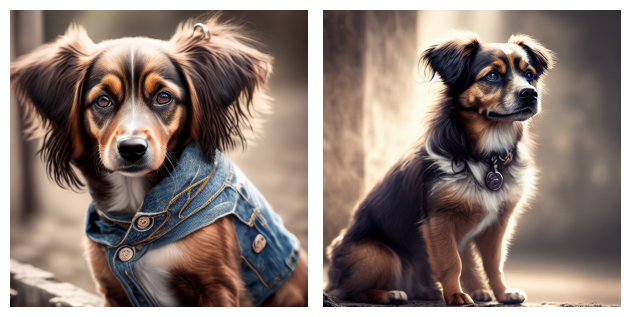

In [28]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt_3, params)